In [3]:
# Import Dataset
import pandas as pd 
data = pd.read_csv('../dataset/data.csv')
data

,MQ2,MQ6,MQ7,MQ9,target
0,1.210000,5.080000,0.010000,4.740000,0
1,1.810000,5.380000,0.170000,5.640000,0
2,1.150000,4.730000,0.010000,0.890000,0
3,1.440000,3.640000,0.010000,3.990000,0
4,4.910000,0.890000,0.000000,1.510000,0
...,...,...,...,...,...
23995,20.960000,38.610000,0.030000,0.620000,3
23996,24.834189,43.240000,0.760000,12.520000,3
23997,8.763730,47.740000,0.103432,0.690000,3
23998,7.926874,45.689553,0.034926,6.023275,3


In [4]:
# Deklarasi vektor fitur dan variabel target
import numpy as np
from keras.utils import to_categorical

X = data.drop('target',axis=1)
y = data['target']

y = to_categorical(y)

In [5]:
# Split Data menjadi Training Set dan Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
# Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
# Build the Model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[4,1]),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation="softmax"),
    
])

 # Print the model summary 
model.summary()

/Users/amarudinzaidan/.virtualenvs/project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 2, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,301 (903.52 KB)

 Trainable params: 231,301 (903.52 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Menghitung Waktu Train
import time
start_time = time.time()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile Model 
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# Fit Model
model.fit(X_train, y_train, epochs = 100, batch_size = 256)

end_time = time.time()
training_time = end_time - start_time
training_minutes = training_time / 60
print("Lama waktu pelatihan: {:.2f} detik".format(training_time))
print("Lama waktu pelatihan: {:.2f} menit".format(training_minutes))

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6027 - loss: 0.8452
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9592 - loss: 0.1022
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9673 - loss: 0.0828
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9629 - loss: 0.0931
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9508 - loss: 0.1134
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9589 - loss: 0.1088
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9645 - loss: 0.0855
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9686 - loss: 0.0776
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9699 - loss: 0.0693
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9709 - loss: 0.0677
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9801 - loss: 0.0509
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step

In [9]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict Model
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int)

In [10]:
# Menampilkan hasil classification report
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
print("Report: \n", classification_report(y_test,y_pred,digits=8))

Report: 
               precision    recall  f1-score   support

           0  1.00000000 0.99236111 0.99616591      1440
           1  0.96830748 0.99722222 0.98255217      1440
           2  0.97362942 0.97430556 0.97396737      1440
           3  0.99574166 0.97430556 0.98490698      1440
           4  0.99860821 0.99652778 0.99756691      1440

   micro avg  0.98708154 0.98694444 0.98701299      7200
   macro avg  0.98725736 0.98694444 0.98703187      7200
weighted avg  0.98725736 0.98694444 0.98703187      7200
 samples avg  0.98694444 0.98694444 0.98694444      7200



/Users/amarudinzaidan/.virtualenvs/project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Menampilkan Evaluasi Model
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy*100:.6f}%')
print(f'f1_score: {f1*100:.6f}%')
print(f'recall_score: {recall*100:.6f}%')
print(f'precision_score: {precision*100:.6f}%')

Accuracy: 98.708332%
f1_score: 98.703187%
recall_score: 98.694444%
precision_score: 98.725736%


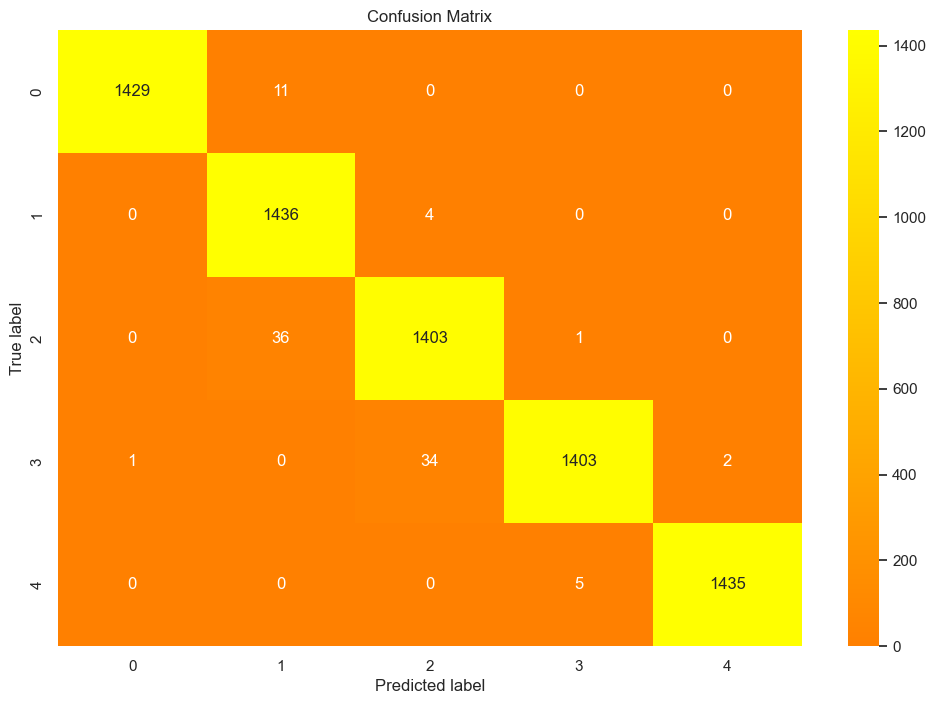

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set()

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm_rf = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
draw_confusion_matrix(cm_rf)